# Lab session 8: Perceptron (single layer) 
__Name: Makesh Srinivasan<br>
Registration number: 19BCE1717<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 4-October-2021 Monday__<br><br>
    
Instructions:<br>
Build a single layer perceptron from scratch and test the model with the Iris dataset, and check the same using sklearn package

## I) Single layer Perceptron (built from scratch)

__1) Import Libraries__

Import the libraries required for data processing and visualisation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__2) Dataset__

Load the Iris dataset using the URL 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'. <br>
The single layer perceptron is a binary classification algorithm; the Iris dataset consists of 3 classes each with fifty instances and thus, only the first 100 containing 2 classes of species will be used in this prediction model

In [2]:
def load(URL_):
    data = pd.read_csv(URL_, header = None)
    data = data[:100]
    # the first 100 rows contains 2 Iris species
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    print("Data loaded...")
    return data
data = load('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

Data loaded...


__3) Visualisation__

Display the plot between sepal length and petal length for the two classes of flowers

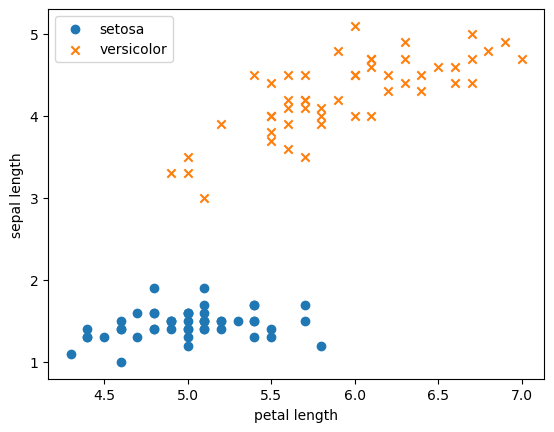

In [3]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

__4) Build a function - single layer perceptron__

In [4]:
def accuracy(p,y):
    if(len(p)!=len(y)):
        print("Number of X records and y targets are not equal!")
        return
    crct=0
    for i in range(len(y)):
        if(y[i]==p[i]):
            crct+=1
    return crct/len(y)

In [5]:
def perceptron(data, num_iter):
    misclassified_list = [] 
    correct_classified_list = []
    features = data[:, :-1]
    labels = data[:, -1]
    w = np.zeros(shape=(1, features.shape[1]+1))
    predicted = []
  
    for epoch in range(num_iter):
        misclassified = 0
        correct_classified = 0
        predicted_epoch = []
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            if (y > 0):
                target = 1.0 
            else:
                target = 0.0
            
            delta = (label.item(0,0) - target)
            predicted_epoch.append(target)
            if(delta):
                misclassified += 1
                w += (delta * x)
            else:
                correct_classified += 1
        
        misclassified_list.append(misclassified)
        correct_classified_list.append(correct_classified)
        predicted.append(predicted_epoch)
        if misclassified == 0:
            print("Epoch " + str(epoch + 1) + " Accuracy = " + str(correct_classified/len(data)))
            print("The maximum accuracy of 1.00 is reached at epoch " + str(epoch+1) + "! Terminating perceptron training and the next epochs...")
            return (w, misclassified_list, correct_classified_list, predicted, epoch+1)
        else:
            print("Epoch " + str(epoch+1) + " Accuracy = " + str(correct_classified/len(data)))
    return (w, misclassified_list, correct_classified_list, predicted, num_iter)

Call the function and store the values of the weigths, number of misclassified and correctly classified species for each epoch in an array

In [6]:
max_iterations = 10 # Set the maximum number of epochs to run = 10 to avoid infinite loop
w, misclassified_list, correct_classified_list, prediction, iterations = perceptron(data, max_iterations)

Epoch 1 Accuracy = 0.99
Epoch 2 Accuracy = 0.97
Epoch 3 Accuracy = 0.99
Epoch 4 Accuracy = 1.0
The maximum accuracy of 1.00 is reached at epoch 4! Terminating perceptron training and the next epochs...


__5) Visualise the performace of the model at each epoch__

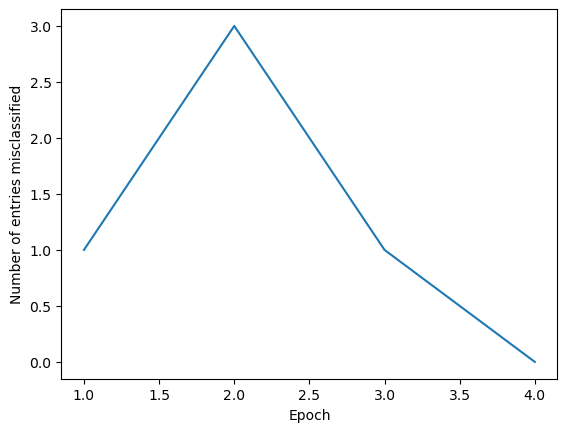

In [7]:
epochs = np.arange(1, iterations+1)
plt.plot(epochs, misclassified_list)
plt.xlabel('Epoch')
plt.ylabel('Number of entries misclassified')
plt.show()

The number of misclassified results initially increased and reached a maximum at the second epoch. By the 4th epoch, the model did not miscassify any species of flower and therefore the curve will be saturated and flat from this epoch. Hence, the training is stopped as this is the best model that was trained using this dataset so far

<br> 
The epoch wise correct classifications:

In [8]:
for i in range(len(correct_classified_list)):
    print("Epoch " + str(i+1) + " -> number of correct predictions: " + str(correct_classified_list[i]))

Epoch 1 -> number of correct predictions: 99
Epoch 2 -> number of correct predictions: 97
Epoch 3 -> number of correct predictions: 99
Epoch 4 -> number of correct predictions: 100


__6) The model weights - coefficients:__

In [9]:
print("The weights are :")
for i in range(len(w[0])):
    print("Coefficient " + str(i) + " = " + str(w[0][i]))

The weights are :
Coefficient 0 = -1.0
Coefficient 1 = -1.0999999999999996
Coefficient 2 = -3.5999999999999996
Coefficient 3 = 5.200000000000001
Coefficient 4 = 2.1999999999999997


__7) Performace__

Using a confusion matrix show the performance of the results of the best epochs - from 3

In [10]:
expected_d = data[:, -1]
expected = []
for i in range(len(expected_d)):
    expected.append(int(expected_d[i]))

In [11]:
def manual_confusion_matrix(predicted, actual):
    tt = 0 #11
    ff = 0 #00
    tf = 0 #10
    ft = 0 #01
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            if predicted[i] == 0:
                ff+=1
            else:
                tt+=1
        else:
            if predicted[i] == 0:
                tf+=1
            else:
                ft+=1
    return (tt, tf, ft, ff)

Confusion matrix (epoch wise): 

Epoch 1) Confusion matrix:
[[50, 0], [1, 49]]
True-True: 49
True-False: 1
False-True: 0
False-False: 50


Epoch 2) Confusion matrix:
[[48, 2], [1, 49]]
True-True: 49
True-False: 1
False-True: 2
False-False: 48


Epoch 3) Confusion matrix:
[[49, 1], [0, 50]]
True-True: 50
True-False: 0
False-True: 1
False-False: 49


Epoch 4) Confusion matrix:
[[50, 0], [0, 50]]
True-True: 50
True-False: 0
False-True: 0
False-False: 50




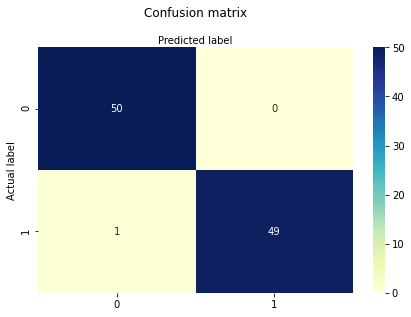

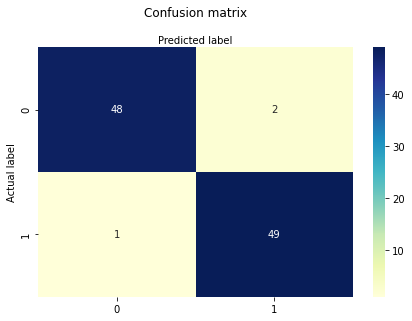

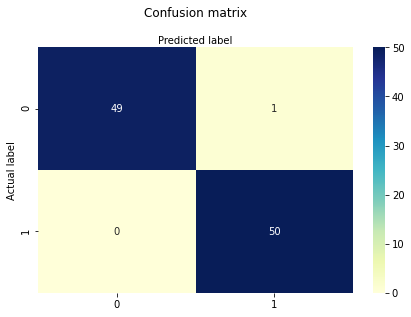

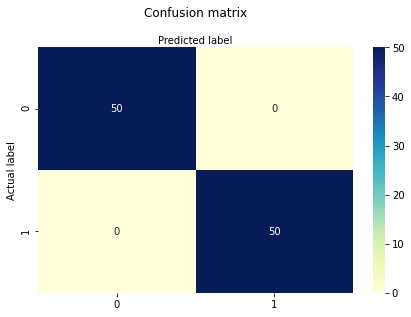

In [12]:
import seaborn as sb
%matplotlib inline
for i in range(iterations):
    epoch_wise_predicted = prediction[i]
    tt,tf,ft,ff = manual_confusion_matrix(list(epoch_wise_predicted), list(expected))
    matrix = [[ff,ft],[tf,tt]]
    print("Epoch " + str(i + 1) + ") Confusion matrix:")
    print(matrix, end="\n")
    print("True-True: " + str(tt))
    print("True-False: " + str(tf))
    print("False-True: " + str(ft))
    print("False-False: " + str(ff))
    
    class_names=["Iris-setosa","Iris-versicolor"] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sb.heatmap(pd.DataFrame(np.array(matrix)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print("\n")

Accuracy:

In [13]:
for i in range(iterations):
    predicted = prediction[i]
    print("Epoch " + str(i+1)+ "    Accuracy = " + str(accuracy(predicted, expected)))

Epoch 1    Accuracy = 0.99
Epoch 2    Accuracy = 0.97
Epoch 3    Accuracy = 0.99
Epoch 4    Accuracy = 1.0


<hr>

## II) Perceptron using sklearn

__1) Libraries__

In [41]:
from sklearn.linear_model import Perceptron

__2) Training the model__

In [42]:
X = data[:, :-1]
y = data[:, -1]
y = np.ravel(y)
model = Perceptron(random_state=1)
model.fit(X, y)

Perceptron(random_state=1)

__3) Prediction__

In [43]:
predicted = model.predict(X)

__4) Performance__

In [44]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y, predicted)
expected = []
for i in range(len(y)):
    expected.append(int(y[i]))
print(results)

[[50  0]
 [ 0 50]]


In [45]:
print("Accuracy = " + str(accuracy(predicted, expected)))

Accuracy = 1.0


<hr>

## Conclusion

The confusion matrix correctly predicted the true positives and false negatives as shown in the confusion matrix of sklearn perceptron and the single layer perceptron that I built. The predictions were correct in case of the self-built perceptron as it is shown to be the same as the predictions made using the sklearn perceptron. The accuracy of 1.00 (maximum accuracy) is reached in both cases.

<hr>